In [1]:
import turicreate


In [2]:
train = turicreate.SFrame('train')

In [3]:
train.show()

Materializing SFrame

Warning: Skipping column 'image'. Unable to show columns of type 'image'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [4]:
train

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [6]:
sketch = turicreate.Sketch(train['label'])

In [7]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [9]:
test = turicreate.SFrame('test')

In [10]:
cat = train[train['label']=='cat']
dog = train[train['label']=='dog']
automobile = train[train['label']=='automobile']
bird = train[train['label']=='bird']

In [11]:
bird

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."
335,Height: 32 Width: 32,bird,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 8.50706672668457, ...","[160.0, 159.0, 154.0,162.0, 161.0, 156.0, ..."
560,Height: 32 Width: 32,bird,"[1.6915949583053589, 0.0,0.0, 0.0, 0.0, 0.0, ...","[147.0, 138.0, 88.0,151.0, 142.0, 92.0, ..."
649,Height: 32 Width: 32,bird,"[0.5111562013626099,0.3241650462150574, 0.0, ...","[65.0, 127.0, 9.0, 127.0,160.0, 15.0, 159.0, ..."
775,Height: 32 Width: 32,bird,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 10.012731552124023, ...","[29.0, 41.0, 25.0, 29.0,42.0, 25.0, 28.0, 41.0, ..."
802,Height: 32 Width: 32,bird,"[0.2771667242050171, 0.0,0.0, 0.0, 0.0, 0.0, ...","[233.0, 230.0, 173.0,222.0, 218.0, 168.0, ..."
975,Height: 32 Width: 32,bird,"[0.0,0.03367185592651367, ...","[59.0, 180.0, 110.0,88.0, 186.0, 117.0, ..."


In [14]:
cat_model = turicreate.nearest_neighbors.create(cat,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [15]:
dog_model = turicreate.nearest_neighbors.create(dog,features=['deep_features'],label='id')
automobile_model = turicreate.nearest_neighbors.create(automobile,features=['deep_features'],label='id')
bird_model = turicreate.nearest_neighbors.create(bird,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

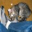

In [17]:
test['image'][0]

In [19]:
cat_model.query(test[0])

ToolkitError: Input dataset is not an SFrame. If it is a Pandas DataFrame, you may use the to_sframe() function to convert it to an SFrame.

In [29]:
kitty=test[0:1]

In [30]:
kitty

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."


In [36]:
cat_model.query(kitty)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 8.315ms      |

| Done         |         | 100         | 54.497ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


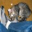

In [35]:
test[0]['image']

,id,image,label,deep_features,image_array
0,16289,,cat,"[0.964287519454956, 0.0, 0.0, 0.0, 1.1251550912857056, 0.0, 9.312150955200195, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9964497089385986, 0.20313739776611328, 0.0, 1.9780253171920776, 0.8170939683914185, 0.0, 0.0, 0.0, 0.0, 1.7009224891662598, 0.5013698935508728, 0.0, 0.0, 0.0, 1.9672785997390747, 0.0, 0.0, 0.0, 0.0, 1.1179927587509155, 0.12306243181228638, 0.0, 0.0, 0.013147711753845215, 0.0, 0.0, 1.0392909049987793, 0.9930934309959412, 0.0, 0.0, 0.22333812713623047, 0.009367823600769043, 0.0, 0.0, 0.0, 0.0, 0.13046950101852417, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5344581604003906, 0.0, 0.0, 0.0, 1.211628794670105, 0.0, 0.0, 0.6291561126708984, 0.35370469093322754, 0.5080443620681763, 2.374500274658203, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6534329056739807, 0.0, 0.0, 2.430657386779785, 0.0, 0.0, 0.0, 0.11062061786651611, 0.4345150589942932, 0.0, 0.0, 0.1659744381904602, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.025784790515899658, 0.5490762591362, 0.21386826038360596, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[215.0, 219.0, 231.0, 215.0, 219.0, 232.0, 216.0, 219.0, 233.0, 214.0, 217.0, 230.0, 213.0, 216.0, 230.0, 209.0, 215.0, 226.0, 208.0, 217.0, 221.0, 206.0, 215.0, 219.0, 201.0, 208.0, 217.0, 197.0, 203.0, 218.0, 194.0, 200.0, 221.0, 199.0, 204.0, 221.0, 142.0, 128.0, 131.0, 76.0, 46.0, 46.0, 81.0, 55.0, 57.0, 147.0, 136.0, 139.0, 160.0, 149.0, 154.0, 152.0, 141.0, 144.0, 156.0, 147.0, 150.0, 159.0, 148.0, 154.0, 160.0, 153.0, 157.0, 164.0, 156.0, 160.0, 160.0, 154.0, 158.0, 158.0, 151.0, 156.0, 159.0, 149.0, 157.0, 159.0, 150.0, 156.0, 157.0, 147.0, 154.0, 156.0, 145.0, 153.0, 152.0, 142.0, 149.0, 147.0, 137.0, 143.0, 141.0, 131.0, 136.0, 142.0, 131.0, 136.0, 215.0, 219.0, 231.0, 215.0, ...]"

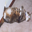

In [37]:
cat[cat['id']==16289].explore()

In [38]:
dog_model.query(kitty)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 8.124ms      |

| Done         |         | 100         | 53.872ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


,id,image,label,deep_features,image_array
0,16976,,dog,"[0.7555953860282898, 0.0, 0.0, 0.0, 0.0, 0.0, 9.460389137268066, 0.12622767686843872, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09528166055679321, 0.0, 0.4171280264854431, 0.0, 0.0, 0.0, 0.08742207288742065, 0.0, 0.0, 0.0, 0.0, 0.5559314489364624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4493837356567383, 0.24993890523910522, 0.0, 0.0, 0.5614703893661499, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6808208227157593, 0.0, 0.0, 0.0, 0.127973735332489, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1695382595062256, 0.0, 0.0, 0.9742746353149414, 0.0, 0.0, 0.0, 0.8248510956764221, 2.490147113800049, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.3068113327026367, 0.5234540700912476, 0.16325676441192627, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[16.0, 17.0, 11.0, 18.0, 19.0, 13.0, 20.0, 21.0, 15.0, 24.0, 25.0, 19.0, 26.0, 27.0, 21.0, 22.0, 23.0, 17.0, 19.0, 20.0, 14.0, 19.0, 20.0, 15.0, 16.0, 17.0, 12.0, 12.0, 13.0, 8.0, 11.0, 12.0, 8.0, 28.0, 17.0, 6.0, 88.0, 44.0, 8.0, 84.0, 41.0, 13.0, 84.0, 46.0, 31.0, 91.0, 51.0, 34.0, 97.0, 56.0, 36.0, 101.0, 61.0, 40.0, 85.0, 51.0, 33.0, 74.0, 45.0, 28.0, 79.0, 47.0, 29.0, 92.0, 54.0, 35.0, 96.0, 53.0, 33.0, 103.0, 58.0, 34.0, 86.0, 48.0, 27.0, 86.0, 52.0, 34.0, 107.0, 68.0, 51.0, 90.0, 61.0, 48.0, 101.0, 93.0, 92.0, 116.0, 130.0, 145.0, 103.0, 110.0, 123.0, 98.0, 94.0, 100.0, 12.0, 13.0, 9.0, 15.0, ...]"

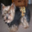

In [40]:
dog[dog['id']==16976].explore()